## Project :- Lending Club Loan Data Analysis

### Project done by :- Pratik Datey

### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

#### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

#### Domain: Finance

#### Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
data=pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
data.shape

(9578, 14)

In [4]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
print(data['credit.policy'].value_counts())

1    7710
0    1868
Name: credit.policy, dtype: int64


Percentage of customer meets the credit underwriting criteria of LendingClub.com
1    80.496972
0    19.503028
Name: credit.policy, dtype: float64


Text(0.5, 1.0, 'Credit Policy-customer meets the credit underwriting criteria of LendingClub.com')

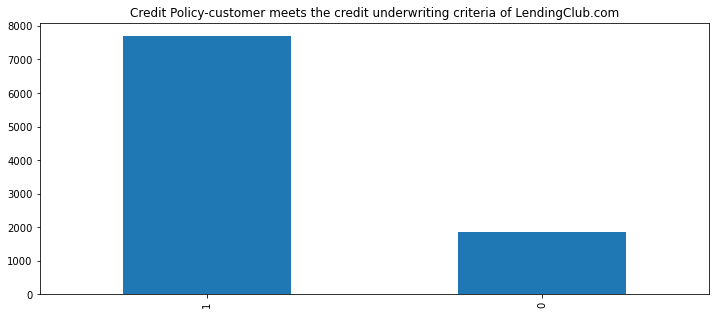

In [7]:
print('Percentage of customer meets the credit underwriting criteria of LendingClub.com')
print((data['credit.policy'].value_counts())/(len(data['credit.policy']))*100)
(data['credit.policy'].value_counts()).plot(kind='bar',figsize=(12,5))
plt.title('Credit Policy-customer meets the credit underwriting criteria of LendingClub.com')

In [8]:
print(data['purpose'].value_counts())

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


Percentage of customer meets the credit underwriting criteria of LendingClub.com
debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: purpose, dtype: float64


Text(0.5, 1.0, 'The purpose of the loan')

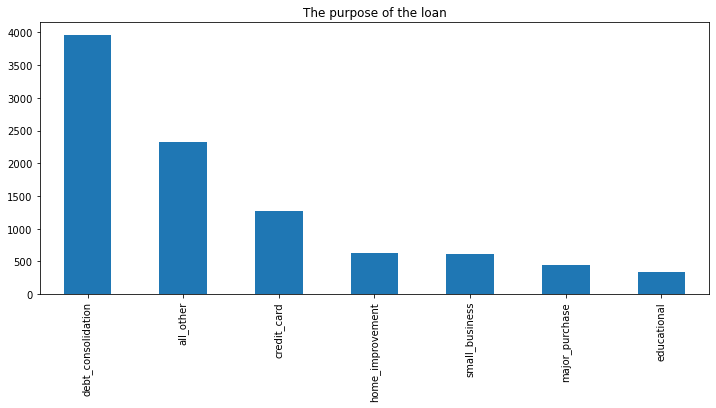

In [9]:
print('Percentage of customer meets the credit underwriting criteria of LendingClub.com')
print((data['purpose'].value_counts())/(len(data['purpose']))*100)
(data['purpose'].value_counts()).plot(kind='bar',figsize=(12,5))
plt.title('The purpose of the loan')

In [10]:
print(data['not.fully.paid'].value_counts())

0    8045
1    1533
Name: not.fully.paid, dtype: int64


Percentage of customer meets the credit underwriting criteria of LendingClub.com
0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64


Text(0.5, 1.0, 'Not Fully Paid')

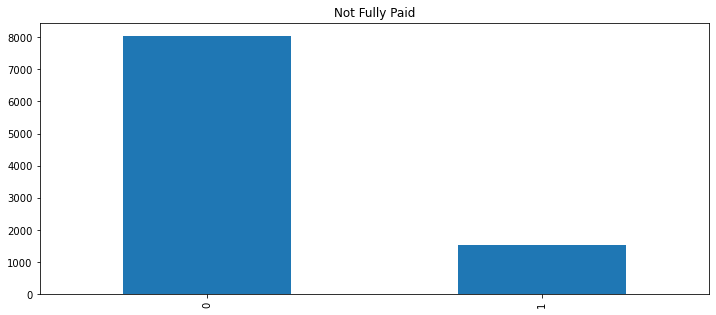

In [11]:
print('Percentage of customer meets the credit underwriting criteria of LendingClub.com')
print((data['not.fully.paid'].value_counts())/(len(data['not.fully.paid']))*100)
(data['not.fully.paid'].value_counts()).plot(kind='bar',figsize=(12,5))
plt.title('Not Fully Paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

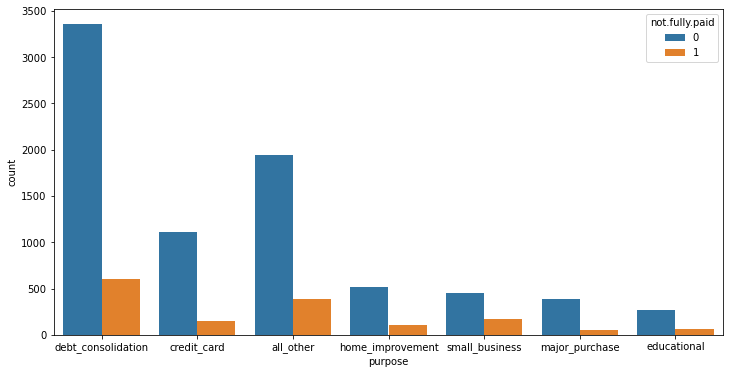

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=data)


Text(0.5, 0, 'FICO')

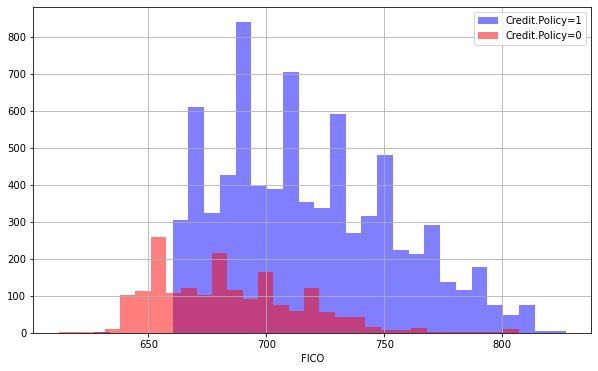

In [13]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


NameError: name 'h' is not defined

Text(0.5, 0, 'FICO')

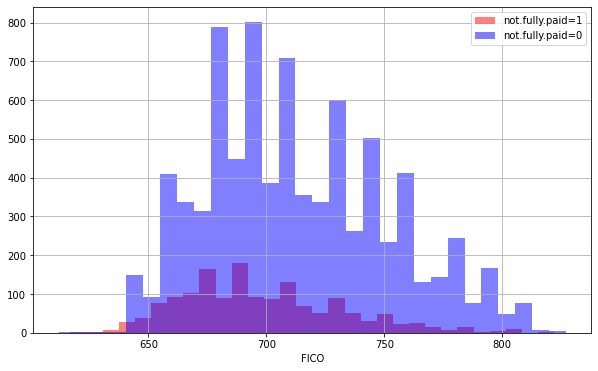

In [18]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

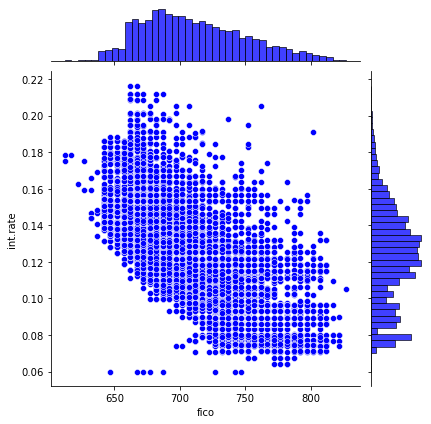

In [19]:
sns.jointplot(x='fico',y='int.rate',data=data,color='blue')

<AxesSubplot:>

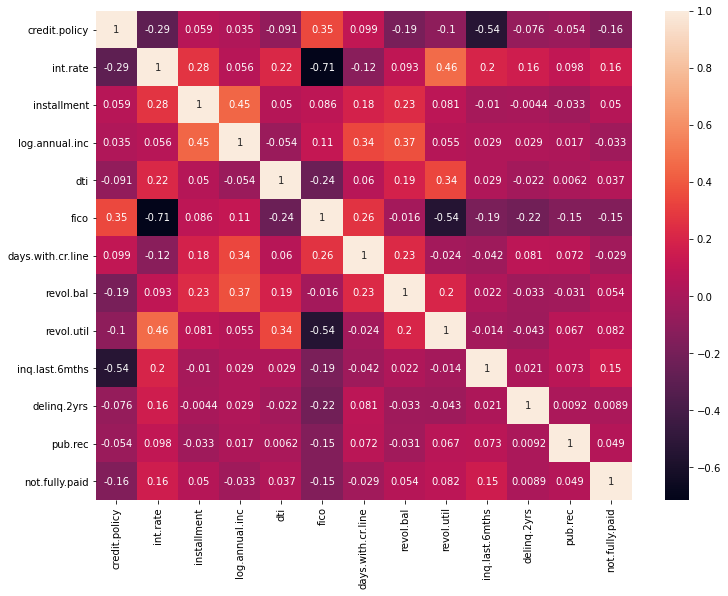

In [20]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True)


In [21]:
data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [22]:
print('There is NO strong correlation between in any features')

There is NO strong correlation between in any features


In [23]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [24]:
data=pd.get_dummies(data,columns=['purpose'])

In [25]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [26]:
data.shape

(9578, 20)

In [27]:
x= data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

In [28]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 102)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model =tf.keras.Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train,  epochs=200, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/200
27/27 [==============================] - 0s 6ms/step - loss: 0.5596 - accuracy: 0.8420 - val_loss: 0.5141 - val_accuracy: 0.8319
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.8434 - val_loss: 0.4630 - val_accuracy: 0.8319
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8434 - val_loss: 0.4536 - val_accuracy: 0.8319
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8434 - val_loss: 0.4493 - val_accuracy: 0.8319
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8434 - val_loss: 0.4431 - val_accuracy: 0.8319
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8434 - val_loss: 0.4385 - val_accuracy: 0.8319
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8434 - val_loss: 0.4353 - val_accuracy: 0.8319
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8447 - val_loss: 0.4233 - val_accuracy: 0.8302
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8440 - val_loss: 0.4231 - val_accuracy: 0.8312
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8443 - val_loss: 0.4242 - val_accuracy: 0.8292
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8444 - val_loss: 0.4238 - val_accuracy: 0.8312
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8438 - val_loss: 0.4249 - val_accuracy: 0.8292
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8444 - val_loss: 0.4229 - val_accuracy: 0.8316
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8443 - val_loss: 0.4234 - val_accuracy: 0.8316
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8455 - val_loss: 0.4300 - val_accuracy: 0.8285
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8456 - val_loss: 0.4293 - val_accuracy: 0.8288
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8456 - val_loss: 0.4296 - val_accuracy: 0.8274
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8458 - val_loss: 0.4313 - val_accuracy: 0.8285
Epoch 177/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8458 - val_loss: 0.4303 - val_accuracy: 0.8274
Epoch 178/200
27/27 [==============================] - ETA: 0s - loss: 0.4086 - accuracy: 0.83 - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8452 - val_loss: 0.4306 - val_accuracy: 0.8278
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8465 - val_loss: 0

<AxesSubplot:>

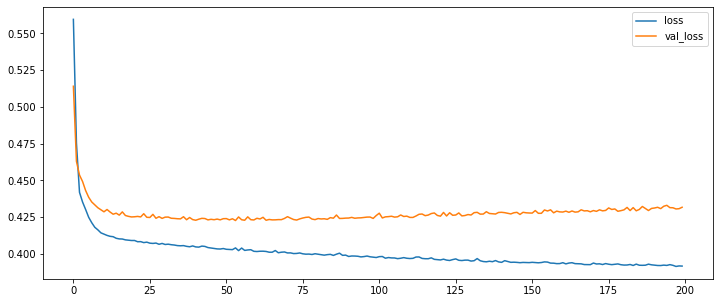

In [32]:
loss=pd.DataFrame(model.history.history)[['loss','val_loss']]
loss.plot(figsize=(12,5))


In [33]:
predictions_new = (model.predict_proba(X_test) >= 0.2).astype('int')

print(confusion_matrix(y_test,predictions_new))
print(classification_report(y_test,predictions_new))



Instructions for updating:
Please use `model.predict()` instead.
[[1919  472]
 [ 282  201]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2391
           1       0.30      0.42      0.35       483

    accuracy                           0.74      2874
   macro avg       0.59      0.61      0.59      2874
weighted avg       0.78      0.74      0.75      2874



In [34]:
model =tf.keras.Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train,  epochs=200, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.8247 - val_loss: 0.4544 - val_accuracy: 0.8319
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8388 - val_loss: 0.4407 - val_accuracy: 0.8319
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8411 - val_loss: 0.4403 - val_accuracy: 0.8319
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8425 - val_loss: 0.4365 - val_accuracy: 0.8319
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8428 - val_loss: 0.4347 - val_accuracy: 0.8319
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8429 - val_loss: 0.4335 - val_accuracy: 0.8319
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8434 - val_loss: 0.4316 - val_accuracy: 0.8319
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8434 - val_loss: 0.4246 - val_accuracy: 0.8319
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8434 - val_loss: 0.4242 - val_accuracy: 0.8319
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8434 - val_loss: 0.4240 - val_accuracy: 0.8319
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8435 - val_loss: 0.4245 - val_accuracy: 0.8319
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8434 - val_loss: 0.4248 - val_accuracy: 0.8319
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8434 - val_loss: 0.4243 - val_accuracy: 0.8319
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8432 - val_loss: 0.4248 - val_accuracy: 0.8319
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8441 - val_loss: 0.4246 - val_accuracy: 0.8319
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8428 - val_loss: 0.4251 - val_accuracy: 0.8319
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8444 - val_loss: 0.4250 - val_accuracy: 0.8319
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8434 - val_loss: 0.4245 - val_accuracy: 0.8319
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8432 - val_loss: 0.4256 - val_accuracy: 0.8319
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8441 - val_loss: 0.4254 - val_accuracy: 0.8316
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8437 - val_loss: 0.4247 - val_accuracy: 0.8316
Epoch 180/200

<AxesSubplot:>

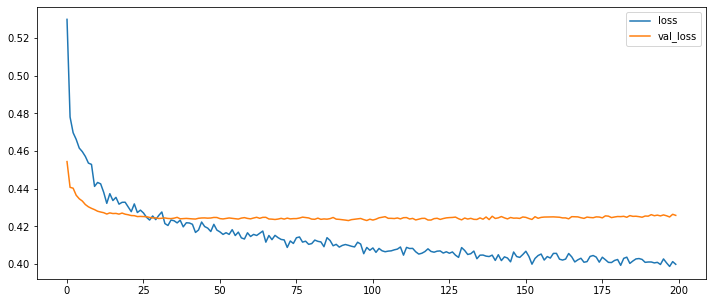

In [36]:
loss=pd.DataFrame(model.history.history)[['loss','val_loss']]

loss.plot(figsize=(12,5))

In [37]:
predictions_new = (model.predict_proba(X_test) >= 0.2).astype('int')

print(confusion_matrix(y_test,predictions_new))
print(classification_report(y_test,predictions_new))

[[1745  646]
 [ 228  255]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2391
           1       0.28      0.53      0.37       483

    accuracy                           0.70      2874
   macro avg       0.58      0.63      0.58      2874
weighted avg       0.78      0.70      0.73      2874

